In [2]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install ipympl 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import seaborn
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import scipy.stats as stats
from PIL import Image
from collections import defaultdict

In [2]:
mnistData = np.load(f"../data/mnist-data-hw3.npz")
print("\nloaded %s data!" % "minst")
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, mnistData[field].shape)
mnistTest = mnistData["test_data"]
mnistAllData = mnistData["training_data"]
mnistAllLabels = mnistData["training_labels"]

spamData = np.load(f"../data/spam-data-hw3.npz")
print("\nloaded %s data!" % "spam")
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, spamData[field].shape)
spamTest = spamData["test_data"]
spamAllData = spamData["training_data"]
spamAllLabels = spamData["training_labels"]



loaded minst data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)


In [3]:
SEED = 0

In [4]:
mnistXReshaped = np.reshape(mnistAllData, (60000, 28*28))
mnistTestReshaped = np.reshape(mnistTest, (10000, 28*28))
# print(mnistAllData[0][0][20])
# print(mnistXReshaped[0])

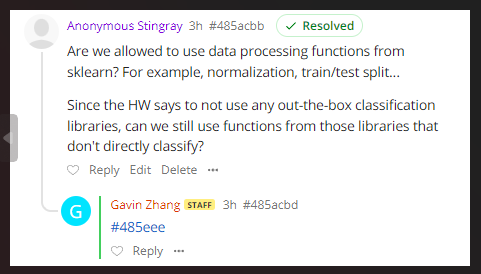
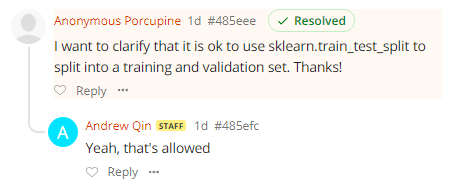

In [5]:
#Data processing  
mnistXReshaped = normalize(mnistXReshaped, norm='l2')
mnistTestReshaped = normalize(mnistTestReshaped, norm='l2')

## Question 1

In [6]:
#Fit Gaussian to Data
mnistTrainCount = np.zeros(10)
mnistTrainRunningSum = np.zeros((10, 784))
mnistTrainMean = np.zeros((10, 784))

for (data, label) in zip(mnistXReshaped, mnistAllLabels):
    mnistTrainCount[label] += 1
    mnistTrainRunningSum[label] += data

for i in range(0,10):
    mnistTrainMean[i] = mnistTrainRunningSum[i] / mnistTrainCount[i]


In [7]:
print(mnistTrainRunningSum.shape)
print(mnistTrainMean.shape)
print(mnistTrainCount[0])

(10, 784)
(10, 784)
5902.0


In [8]:
#QDA Estimation of Varience
mnistTrainVar = np.zeros((10, 784, 784))
mnistTrainQDAVar = np.zeros((10, 784, 784))

for (data, label) in zip(mnistXReshaped, mnistAllLabels):
    meanDiff = data - mnistTrainMean[label]
    mnistTrainVar[label] += np.outer(meanDiff, meanDiff)

for i in range(0,10):
    mnistTrainQDAVar[i] = mnistTrainVar[i] / mnistTrainCount[i]

## Question 2

(784, 784)


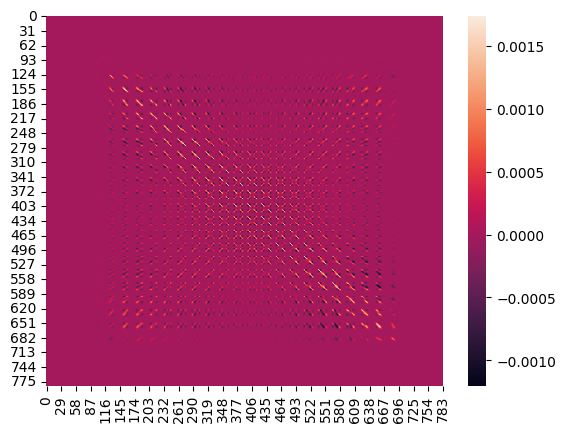

In [9]:
#Heatmap
ax = seaborn.heatmap(mnistTrainQDAVar[0])
print(mnistTrainQDAVar[1].shape)

## Question 3

### Part a

In [10]:
mnistTrainX, mnistTestX, mnistTrainY, mnistTestY = train_test_split(mnistXReshaped, mnistAllLabels, test_size=10000, random_state=SEED, shuffle=True)

In [11]:
print("mnist trainData shape: ", mnistTrainX.shape)
print("mnist testData shape: ", mnistTestX.shape)
print("mnist trainLabel shape: ", mnistTrainY.shape)
print("mnist testLabel shape: ", mnistTestY.shape)

mnist trainData shape:  (50000, 784)
mnist testData shape:  (10000, 784)
mnist trainLabel shape:  (50000,)
mnist testLabel shape:  (10000,)


In [12]:
def computeMean(inputData, inputLabels):
    #Fit Gaussian to Data
    mnistTrainCount = np.zeros(10)
    mnistTrainRunningSum = np.zeros((10, 784))
    mnistTrainMean = np.zeros((10, 784))

    for (data, label) in zip(inputData, inputLabels):
        mnistTrainCount[label] += 1
        mnistTrainRunningSum[label] += data

    for i in range(0,10):
        mnistTrainMean[i] = mnistTrainRunningSum[i] / mnistTrainCount[i]
    
    # print(mnistTrainRunningSum.shape)
    # print(mnistTrainMean.shape)
    # print(mnistTrainCount[0])

    return mnistTrainCount, mnistTrainMean

In [13]:
def computeClassVarience(inputData, inputLabels, mean):
    #QDA Estimation of Varience
    classVar = np.zeros((10, 784, 784))

    for (data, label) in zip(inputData, inputLabels):
        meanDiff = data - mean[label]
        classVar[label] += np.outer(meanDiff, meanDiff)
    return classVar

In [14]:
def computeLDAVar(classVar, totalPoints):
    #Find Pooled Varience
    pooledVarience = np.zeros((784, 784))
    for i in range(0, 10):
        pooledVarience += classVar[i]

    mnistTrainLDAVar = pooledVarience / totalPoints

    return mnistTrainLDAVar

In [21]:
def linDiscrim(classIndex, classMean, point, classPreCalc, priorProb):
    result = np.dot(classPreCalc[classIndex], point)
    result = result - (np.dot(classPreCalc[classIndex], classMean[classIndex]))/2
    result = result + np.log(priorProb)
    return result

errorLin = defaultdict(lambda:np.zeros((2, 10)))
for numTestPoints in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]: #, 500, 1000, 2000, 5000, 10000, 30000, 30000]:
    #Train on i points
    trainSetX = mnistTrainX[:numTestPoints]
    trainSetY = mnistTrainY[:numTestPoints]

    classCount, classMean = computeMean(trainSetX, trainSetY)
    classVar = computeClassVarience(trainSetX, trainSetY, classMean)
    LDAVar = computeLDAVar(classVar, numTestPoints)
    LDAVarPseudoInv = np.linalg.pinv(LDAVar)

    classPreCalc = {}
    #Precalculate some values
    for i in range(0, 10):
        classPreCalc[i] = np.dot(classMean[i].T, LDAVarPseudoInv)

    #Using linear Disc
    #Test
    errorCount = 0
    for testPointIndex in range(0, len(mnistTestX)):
        linDisc = np.empty((10))
        for i in range(0, 10):
            pi = classCount[i]/numTestPoints
            linDisc[i] = linDiscrim(i, classMean, mnistTestX[testPointIndex], classPreCalc, pi)
        pred = np.argmax(linDisc)
        if (pred != mnistTestY[testPointIndex]):
            errorLin[numTestPoints][0][mnistTestY[testPointIndex]] += 1
            errorCount+=1
        errorLin[numTestPoints][1][mnistTestY[testPointIndex]] += 1
        
    print(errorCount/(len(mnistTestX)))
    # errorLin.append((numTestPoints, errorCount/(errorCount+correctCount)))

0.3325
0.3218
0.6465
0.3203
0.2143
0.1576
0.1423
0.1319
0.132


100 Training Points, with 0.3325 error rate
200 Training Points, with 0.3218 error rate
500 Training Points, with 0.6465 error rate
1000 Training Points, with 0.3203 error rate
2000 Training Points, with 0.2143 error rate
5000 Training Points, with 0.1576 error rate
10000 Training Points, with 0.1423 error rate
30000 Training Points, with 0.1319 error rate
50000 Training Points, with 0.132 error rate


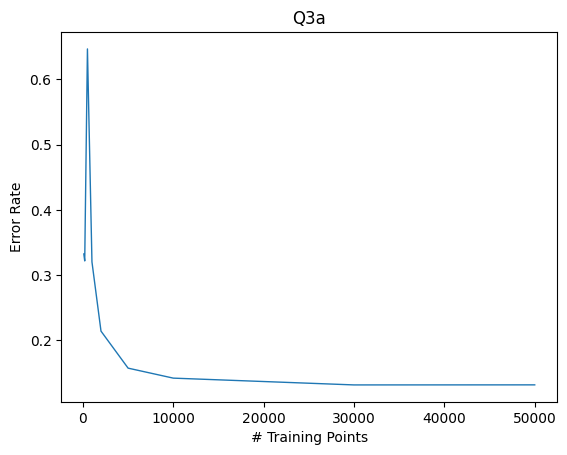

In [249]:
for i in errorLin:
    print(f"{i[0]} Training Points, with {i[1]} error rate")

errorX = [pts[0] for pts in errorLin]
errorY = [pts[1] for pts in errorLin]

fig, ax = plt.subplots()
ax.plot(errorX, errorY, linewidth=1)
plt.title("Q3a")
plt.xlabel("# Training Points")
plt.ylabel("Error Rate")
plt.show()

### Part b

In [241]:
def computeQDAClassVar(inputData, inputLabels, classMean, classCount):
    #QDA Estimation of Varience
    mnistTrainVar = np.zeros((10, 784, 784))
    mnistTrainQDAVar = np.zeros((10, 784, 784))

    for (data, label) in zip(inputData, inputLabels):
        meanDiff = data - classMean[label]
        mnistTrainVar[label] += np.outer(meanDiff, meanDiff)
        #print("mnistTrain: ", mnistTrainVar[label][300])
        
    for i in range(0,10):
        mnistTrainQDAVar[i] = (mnistTrainVar[i] / classCount[i]) 
        mnistTrainQDAVar[i] = mnistTrainQDAVar[i] + 1e-10*np.identity(784)
        #print(mnistTrainQDAVar)
        #print(mnistTrainQDAVar[i][2])
    return mnistTrainQDAVar

In [ ]:
def quadDiscrim(index, inverseQDAVar, pointMeanDiff):
    result = (np.linalg.multi_dot([pointMeanDiff[index].T, inverseQDAVar[index], pointMeanDiff[index]]))/(-2)
    return result

error = []
for numTestPoints in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]: #, 500, 1000, 2000, 5000, 10000, 30000, 30000]:
    #Train on i points
    trainSetX = mnistTrainX[:numTestPoints]
    trainSetY = mnistTrainY[:numTestPoints]
    
    # print(trainSetX.shape)
    # print(trainSetY.shape)

    classCount, classMean = computeMean(trainSetX, trainSetY)
    QDAClassVar = computeQDAClassVar(trainSetX, trainSetY, classMean, classCount)

    preCalc = np.empty((10))
    inverseQDAVar = np.empty((10, 784, 784))
    pi = np.empty((10))

    for i in range(0,10):
        #print(np.linalg.slogdet(QDAClassVar[i])[1])
        preCalc[i]= (np.linalg.slogdet(QDAClassVar[i])[1])/(-2) + np.log(classCount[i]/numTestPoints)
        inverseQDAVar[i] = np.linalg.inv(QDAClassVar[i])
        pi[i] = classCount[i]/numTestPoints

    # print("classmean: ", classMean.shape)
    # print(mnistTestX[testPointIndex].shape)
    #Using quadratic Disc
    #Test
    errorCount = 0
    correctCount = 0
    for testPointIndex in range(0, len(mnistTestX)):
        print(testPointIndex)
        point = mnistTestX[testPointIndex]
        pointMeanDiff = point - classMean
        # print("pointmeandiff: ", pointMeanDiff.shape)
        quadDisc = np.empty(10)
        for i in range(0,10):
            quadDisc[i] = quadDiscrim(i, inverseQDAVar, pointMeanDiff)
        quadDisc = quadDisc + preCalc

        pred = np.argmax(quadDisc)
        if (pred != mnistTestY[testPointIndex]):
            errorCount += 1
        else:
            correctCount += 1
    print(errorCount/(errorCount+correctCount))
    error.append((numTestPoints, errorCount/(errorCount+correctCount)))

100 Training Points, with 0.2304 error rate
200 Training Points, with 0.1549 error rate
500 Training Points, with 0.0958 error rate
1000 Training Points, with 0.0801 error rate
2000 Training Points, with 0.1409 error rate
5000 Training Points, with 0.3518 error rate
10000 Training Points, with 0.1893 error rate
30000 Training Points, with 0.2026 error rate
50000 Training Points, with 0.2255 error rate


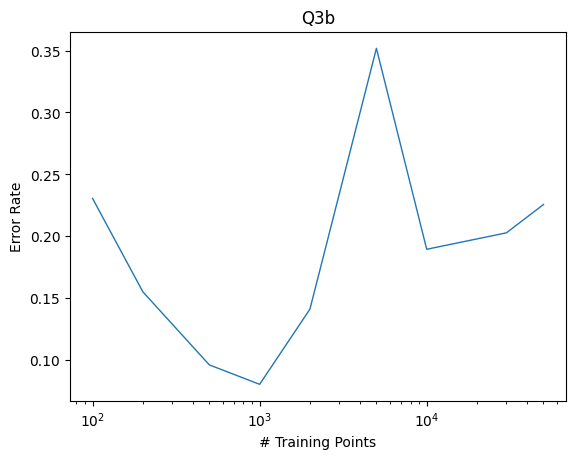

In [252]:
for i in error:
    print(f"{i[0]} Training Points, with {i[1]} error rate")

errorX = [pts[0] for pts in error]
errorY = [pts[1] for pts in error]

fig, ax = plt.subplots()
ax.plot(errorX, errorY, linewidth=1)
plt.title("Q3b")
plt.xlabel("# Training Points")
plt.xscale("log")
plt.ylabel("Error Rate")
plt.show()

### Part d

[[0.11946447 0.26118721 0.26878613 0.37709773 0.28098291 0.49389567
  0.47157895 0.41580433 0.30498534 0.34851485]
 [0.1277034  0.13789954 0.261079   0.52517275 0.26495726 0.43840178
  0.29789474 0.26810913 0.46236559 0.45148515]
 [0.56024717 0.29497717 0.80635838 0.78381046 0.65277778 0.74805771
  0.70421053 0.60677328 0.68914956 0.65643564]
 [0.17610711 0.10228311 0.46339114 0.42941757 0.26282051 0.45394007
  0.26526316 0.37723424 0.3998045  0.28415842]
 [0.08341916 0.05022831 0.28998073 0.26554788 0.15918803 0.38512764
  0.17789474 0.25211665 0.2629521  0.23267327]
 [0.06179197 0.04292237 0.23121387 0.19447187 0.12820513 0.26415094
  0.13473684 0.16368768 0.1945259  0.17128713]
 [0.05870237 0.04383562 0.18400771 0.17966436 0.11431624 0.22530522
  0.11052632 0.16745061 0.18670577 0.15940594]
 [0.05252317 0.03835616 0.15992293 0.17374136 0.1025641  0.19755827
  0.11052632 0.16650988 0.17790811 0.14455446]
 [0.04737384 0.04292237 0.16859345 0.17374136 0.10470085 0.19533851
  0.10842105

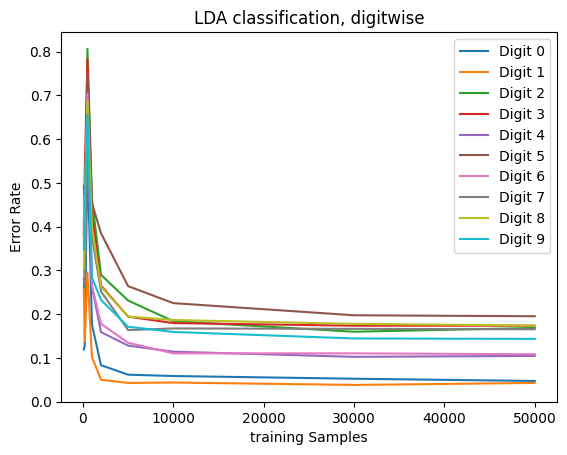

In [28]:
errorRate = np.zeros((9, 10))
numSample = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for index in range(0,9):
    errorRate[index] = errorLin[numSample[index]][0]/errorLin[numSample[index]][1]
print(errorRate)
errorRate = errorRate.T
for index in range(0,10):
    plt.plot(numSample, errorRate[index], label = f"Digit {index}")
    plt.legend()
plt.title("LDA classification, digitwise")
plt.xlabel("training Samples")
plt.ylabel("Error Rate")
plt.show()

## Question 4

In [ ]:
#Train on i points
trainSetX = mnistTrainX[:1000]
trainSetY = mnistTrainY[:1000]

# print(trainSetX.shape)
# print(trainSetY.shape)

classCount, classMean = computeMean(trainSetX, trainSetY)
QDAClassVar = computeQDAClassVar(trainSetX, trainSetY, classMean, classCount)

preCalc = np.empty((10))
inverseQDAVar = np.empty((10, 784, 784))
pi = np.empty((10))

for i in range(0,10):
    #print(np.linalg.slogdet(QDAClassVar[i])[1])
    preCalc[i]= (np.linalg.slogdet(QDAClassVar[i])[1])/(-2) + np.log(classCount[i]/numTestPoints)
    inverseQDAVar[i] = np.linalg.inv(QDAClassVar[i])
    pi[i] = classCount[i]/numTestPoints

# print("classmean: ", classMean.shape)
# print(mnistTestX[testPointIndex].shape)
#Using quadratic Disc
#Test
errorCount = 0
correctCount = 0
pred = []
for testIndex in range(0, len(mnistTestReshaped)):
    print(testIndex)
    point = mnistTestReshaped[testIndex]
    pointMeanDiff = point - classMean
    quadDisc = np.empty(10)
    for i in range(0,10):
        quadDisc[i] = quadDiscrim(i, inverseQDAVar, pointMeanDiff)
    quadDisc = quadDisc + preCalc

    pred.append(np.argmax(quadDisc))
    

In [263]:
import pandas as pd
list = [*range(1, len(pred)+1)]
outputDict = {"Id":list, "Category": pred}
df = pd.DataFrame(outputDict)
df.to_csv('mnistResult.csv', index=False)